In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_test = pd.read_csv('/home/ihsan/Documents/GitHub/ML-AI-ICT-course/dataset/codingTest/test_AbJTz2l.csv')
df_train = pd.read_csv('/home/ihsan/Documents/GitHub/ML-AI-ICT-course/dataset/codingTest/train_v9rqX0R.csv')



In [3]:
# test data preprocessing

df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
columns = ['Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Identifier','Item_Type','Item_Fat_Content','Item_Identifier']
for column in columns:
  df_test[column] = encoder.fit_transform(df_test[column])

In [5]:
df_test['Outlet_Size'] = df_test['Outlet_Size'].fillna(df_test.groupby('Outlet_Size')['Item_Identifier'].count().idxmax())
df_test['Item_Weight'] = df_test['Item_Weight'].fillna(df_test['Item_Weight'].median())
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300,4,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600,1,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315,1,0.015388,13,155.0340,2,2007,3,1,1
4,1184,12.500,2,0.118599,4,234.2300,5,1985,1,2,3


In [6]:
df_test.shape

(5681, 11)

In [7]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
df_train.shape

(8523, 12)

In [9]:
df_test.shape

(5681, 11)

In [10]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [12]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Item_Weight is numerical column so we fill it with Mean Imputation


In [14]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [15]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [16]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
df_train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [18]:
df_train['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [19]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [20]:
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [21]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [22]:
df_train.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [23]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# EDA with Dtale Library

In [24]:
import dtale

In [25]:
dtale.show(df_train)

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Cleaning using Klib Library

In [27]:
import klib
# klib.clean - functions for cleaning datasets
klib.data_cleaning(df_train) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)
klib.data_cleaning(df_test)

Shape of cleaned data: (8523, 12) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.52 MB (-66.67%)

Shape of cleaned data: (5681, 11) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.36 MB (-75.0%)



,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,1103,20.750,1,0.007565,13,107.862198,9,1999,1,0,1
1,1067,8.300,4,0.038428,4,87.319801,2,2007,3,1,1
2,1406,14.600,1,0.099575,11,241.753799,0,1998,3,2,0
3,809,7.315,1,0.015388,13,155.033997,2,2007,3,1,1
4,1184,12.500,2,0.118599,4,234.229996,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500,2,0.013496,13,141.315399,8,1997,2,0,1
5677,306,7.600,2,0.142991,15,169.144806,3,2009,1,2,2
5678,1412,10.000,1,0.073529,8,118.744003,7,2002,3,1,1
5679,517,15.300,2,0.000000,3,214.621796,2,2007,3,1,1


In [28]:
klib.clean_column_names(df_train) # cleans and standardizes column names, also called inside data_cleaning()
klib.clean_column_names(df_test)


,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,1103,20.750,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300,4,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600,1,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315,1,0.015388,13,155.0340,2,2007,3,1,1
4,1184,12.500,2,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500,2,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600,2,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000,1,0.073529,8,118.7440,7,2002,3,1,1
5679,517,15.300,2,0.000000,3,214.6218,2,2007,3,1,1


In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8523 non-null   object 
 1   item_weight                8523 non-null   float64
 2   item_fat_content           8523 non-null   object 
 3   item_visibility            8523 non-null   float64
 4   item_type                  8523 non-null   object 
 5   item_mrp                   8523 non-null   float64
 6   outlet_identifier          8523 non-null   object 
 7   outlet_establishment_year  8523 non-null   int64  
 8   outlet_size                8523 non-null   object 
 9   outlet_location_type       8523 non-null   object 
 10  outlet_type                8523 non-null   object 
 11  item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [30]:
df_train=klib.convert_datatypes(df_train) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_identifier            8523 non-null   string  
 1   item_weight                8523 non-null   float32 
 2   item_fat_content           8523 non-null   category
 3   item_visibility            8523 non-null   float32 
 4   item_type                  8523 non-null   category
 5   item_mrp                   8523 non-null   float32 
 6   outlet_identifier          8523 non-null   category
 7   outlet_establishment_year  8523 non-null   int16   
 8   outlet_size                8523 non-null   category
 9   outlet_location_type       8523 non-null   category
 10  outlet_type                8523 non-null   category
 11  item_outlet_sales          8523 non-null   float32 
dtypes: category(6), float32(4), int16(1), string(1)
memory usage: 268.2 KB


In [31]:
klib.mv_col_handling(df_train)

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.809204,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.269199,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.617996,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,FDX07,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,OUT010,1998,Medium,Tier 3,Grocery Store,732.380005
4,NCD19,8.930000,Low Fat,0.000000,Household,53.861401,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865000,Low Fat,0.056783,Snack Foods,214.521805,OUT013,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,FDS36,8.380000,Regular,0.046982,Baking Goods,108.156998,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,NCJ29,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,FDN46,7.210000,Regular,0.145221,Snack Foods,103.133202,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.597656


# Preprocessing Task before Model Building

# 1) Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [33]:
df_train['item_fat_content']= le.fit_transform(df_train['item_fat_content'])
df_train['item_type']= le.fit_transform(df_train['item_type'])
df_train['outlet_size']= le.fit_transform(df_train['outlet_size'])
df_train['outlet_location_type']= le.fit_transform(df_train['outlet_location_type'])
df_train['outlet_type']= le.fit_transform(df_train['outlet_type'])
df_train['item_identifier']= le.fit_transform(df_train['item_identifier'])
df_train['outlet_identifier']= le.fit_transform(df_train['outlet_identifier'])

In [34]:
df_train

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,156,9.300000,1,0.016047,4,249.809204,9,1999,1,0,1,3735.137939
1,8,5.920000,2,0.019278,14,48.269199,3,2009,1,2,2,443.422791
2,662,17.500000,1,0.016760,10,141.617996,9,1999,1,0,1,2097.270020
3,1121,19.200001,2,0.000000,6,182.095001,0,1998,1,2,0,732.380005
4,1297,8.930000,1,0.000000,9,53.861401,1,1987,0,2,1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865000,1,0.056783,13,214.521805,1,1987,0,2,1,2778.383301
8519,897,8.380000,2,0.046982,0,108.156998,7,2002,1,1,1,549.284973
8520,1357,10.600000,1,0.035186,8,85.122398,6,2004,2,1,1,1193.113647
8521,681,7.210000,2,0.145221,13,103.133202,3,2009,1,2,2,1845.597656


# 2) Splitting our data into train and test

In [35]:
X=df_train.drop('item_outlet_sales',axis=1)

In [36]:
Y=df_train['item_outlet_sales']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)


# 3) Standarization

In [38]:
X.describe()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857646,1.369354,0.066132,7.226681,140.992767,4.722281,1997.831867,1.170832,1.112871,1.201220
std,449.222377,4.226124,0.644810,0.051598,4.209990,62.275066,2.837201,8.371760,0.600327,0.812757,0.796459
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290001,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,395.500000,9.310000,1.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,783.000000,12.857645,1.000000,0.053931,6.000000,143.012802,5.000000,1999.000000,1.000000,1.000000,1.000000
75%,1167.000000,16.000000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888397,9.000000,2009.000000,2.000000,2.000000,3.000000


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
sc= StandardScaler()

In [40]:
X_train_std= sc.fit_transform(X_train)

In [41]:
X_test_std= sc.transform(X_test)

In [42]:
X_train_std

array([[ 0.59264645,  1.52290023, -0.57382672, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.50626006, -1.239856  , -0.57382672, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [-0.23049765,  1.54667619,  0.97378032, ..., -0.28872895,
        -0.13870429, -0.25964107],
       ...,
       [ 1.44241516, -0.08197109, -0.57382672, ...,  1.37953713,
        -1.36527477, -0.25964107],
       [ 0.81008074, -0.74888436,  0.97378032, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 1.114045  ,  0.67885675, -0.57382672, ..., -0.28872895,
         1.08786619,  0.98524841]])

In [43]:
X_test_std

array([[ 1.39360338, -0.43860916, -0.57382672, ..., -0.28872895,
         1.08786619,  0.98524841],
       [ 0.7146759 ,  1.22570184, -0.57382672, ..., -1.95699503,
         1.08786619, -0.25964107],
       [ 0.3419314 , -1.2184578 ,  0.97378032, ...,  1.37953713,
        -1.36527477, -0.25964107],
       ...,
       [ 1.38250979,  0.65508101, -0.57382672, ..., -0.28872895,
         1.08786619, -1.50453056],
       [ 1.23385574,  1.01171909, -0.57382672, ..., -0.28872895,
         1.08786619,  0.98524841],
       [ 0.37299344, -1.56558541,  0.97378032, ..., -0.28872895,
        -0.13870429, -0.25964107]])

In [44]:
Y_train

3684     163.786804
1935    1607.241211
5142    1510.034424
4978    1784.343994
2299    3558.035156
           ...     
599     5502.836914
5695    1436.796387
8006    2167.844727
1361    2700.484863
1547     829.586792
Name: item_outlet_sales, Length: 6818, dtype: float32

In [45]:
Y_test

8179     904.822205
8355    2795.694092
3411    1947.464966
7089     872.863770
6954    2450.144043
           ...     
1317    1721.093018
4996     914.809204
531      370.184814
3891    1358.232056
6629    2418.185547
Name: item_outlet_sales, Length: 1705, dtype: float32

# Model building

In [46]:
X_test.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
8179,1409,11.000000,1,0.055163,8,100.335800,3,2009,1,2,2
8355,1103,18.000000,1,0.038979,13,148.641800,1,1987,0,2,1
3411,935,7.720000,2,0.074731,1,77.598602,8,1997,2,0,1
7089,336,20.700001,1,0.049035,6,39.950600,2,2007,1,1,1
6954,365,7.550000,1,0.027225,3,152.934006,7,2002,1,1,1


In [47]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [49]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [50]:
Y_pred_lr=lr.predict(X_test_std)

In [51]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.5075582265529937
879.1223101419268
1158.4832505368795


# Random Forest Regressor

In [52]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor(n_estimators=1000)

In [53]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [54]:
Y_pred_rf= rf.predict(X_test_std)

In [55]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.5563327600684829
777.7238772319201
1099.615863984166


# XG Boost Regressor

In [56]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [57]:
from xgboost import XGBRegressor
xg= XGBRegressor()

In [58]:
xg.fit(X_train_std, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [59]:
Y_pred_xg=xg.predict(X_test_std)

In [60]:
print(r2_score(Y_test,Y_pred_xg))
print(mean_absolute_error(Y_test,Y_pred_xg))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_xg)))

0.5306566674419321
806.12274
1130.9872


# Hyper parameter tuning

In [61]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)
# define grid search
grid = dict(n_estimators=n_estimators)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,scoring='r2',error_score=0,verbose=2,cv=2)
grid_search_forest.fit(X_train_std, Y_train)
# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] END ....................................n_estimators=10; total time=   0.1s
[CV] END ....................................n_estimators=10; total time=   0.1s
[CV] END ...................................n_estimators=100; total time=   1.1s
[CV] END ...................................n_estimators=100; total time=   1.1s
[CV] END ..................................n_estimators=1000; total time=  11.0s
[CV] END ..................................n_estimators=1000; total time=  11.2s
Best: 0.555 using {'n_estimators': 1000}
0.519 (0.008) with: {'n_estimators': 10}
0.553 (0.002) with: {'n_estimators': 100}
0.555 (0.004) with: {'n_estimators': 1000}


In [62]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [63]:
grid_search_forest.best_score_

0.5553002089436897

In [64]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [65]:
r2_score(Y_test,Y_pred_rf_grid)

0.5557421481449567

In [66]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            5681 non-null   int64  
 1   item_weight                5681 non-null   float64
 2   item_fat_content           5681 non-null   int64  
 3   item_visibility            5681 non-null   float64
 4   item_type                  5681 non-null   int64  
 5   item_mrp                   5681 non-null   float64
 6   outlet_identifier          5681 non-null   int64  
 7   outlet_establishment_year  5681 non-null   int64  
 8   outlet_size                5681 non-null   int64  
 9   outlet_location_type       5681 non-null   int64  
 10  outlet_type                5681 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 488.3 KB


In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8523 non-null   int64  
 1   item_weight                8523 non-null   float32
 2   item_fat_content           8523 non-null   int64  
 3   item_visibility            8523 non-null   float32
 4   item_type                  8523 non-null   int64  
 5   item_mrp                   8523 non-null   float32
 6   outlet_identifier          8523 non-null   int64  
 7   outlet_establishment_year  8523 non-null   int16  
 8   outlet_size                8523 non-null   int64  
 9   outlet_location_type       8523 non-null   int64  
 10  outlet_type                8523 non-null   int64  
dtypes: float32(3), int16(1), int64(7)
memory usage: 582.8 KB


In [68]:
Y.shape

(8523,)

In [69]:
rf.fit(X,Y)

RandomForestRegressor(n_estimators=1000)

In [70]:
final_pred = rf.predict(df_test)

In [71]:
df_solution = pd.read_csv('sample_submission_8RXa3c6.csv')
df_solution['Item_Outlet_Sales'] = final_pred
df_solution.to_csv('final_submission.csv', index=False)

In [72]:
dtale.show(df_solution)

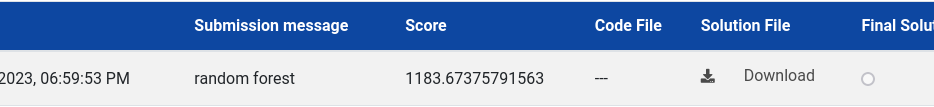

In [73]:
from IPython.display import Image

image_path = '/home/ihsan/Documents/GitHub/ML-AI-ICT-course/Analytics.png'  # Replace with the actual path of your image

Image(filename=image_path)

In [74]:
grid_search_forest.fit(X,Y)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] END ....................................n_estimators=10; total time=   0.2s
[CV] END ....................................n_estimators=10; total time=   0.2s
[CV] END ...................................n_estimators=100; total time=   1.5s
[CV] END ...................................n_estimators=100; total time=   1.5s
[CV] END ..................................n_estimators=1000; total time=  14.1s
[CV] END ..................................n_estimators=1000; total time=  14.2s


GridSearchCV(cv=2, error_score=0, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [10, 100, 1000]}, scoring='r2',
             verbose=2)

In [75]:
final_pred2 = grid_search_forest.predict(df_test)

In [76]:
df_solution2 = pd.read_csv('sample_submission_8RXa3c6.csv')
df_solution2['Item_Outlet_Sales'] = final_pred
df_solution2.to_csv('final_submission3.csv', index=False)

In [77]:
dtale.show(df_solution2)

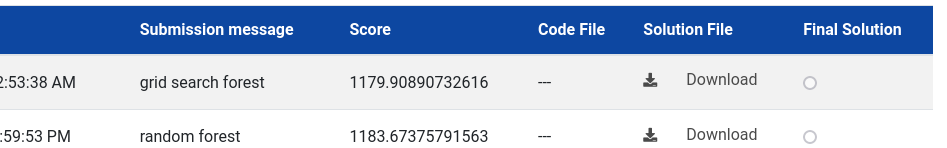

In [78]:
Image('/home/ihsan/Documents/GitHub/ML-AI-ICT-course/grid search forest.png')
# got 1179